In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X, y = sklearn.datasets.make_moons(200, noise = 0.2)

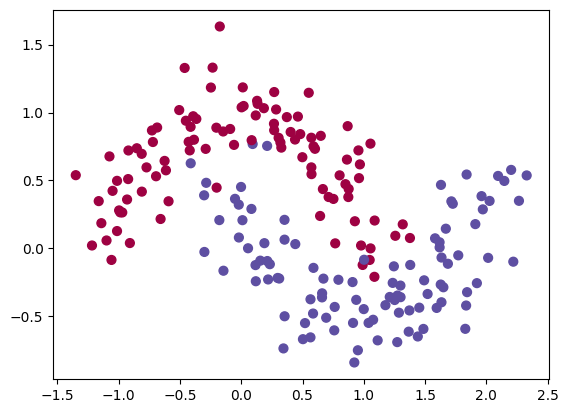

In [3]:
plt.scatter(X[:,0], X[:,1], s = 40, c = y, cmap = plt.cm.Spectral)
plt.show()

In [4]:
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

In [5]:
class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
    
    def forward(self, X):
        X = self.hidden(X)
        X = F.relu(X)
        X = self.out(X)
        return X

In [6]:
network = FeedForward(X.shape[1], 50, 2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02, momentum = 0.9)
loss = nn.CrossEntropyLoss()

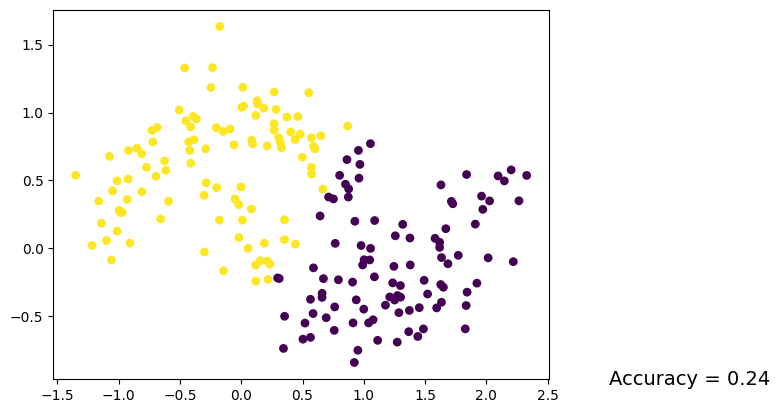

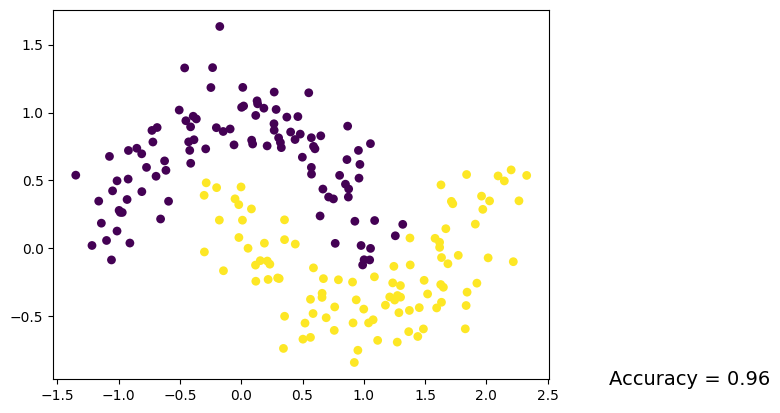

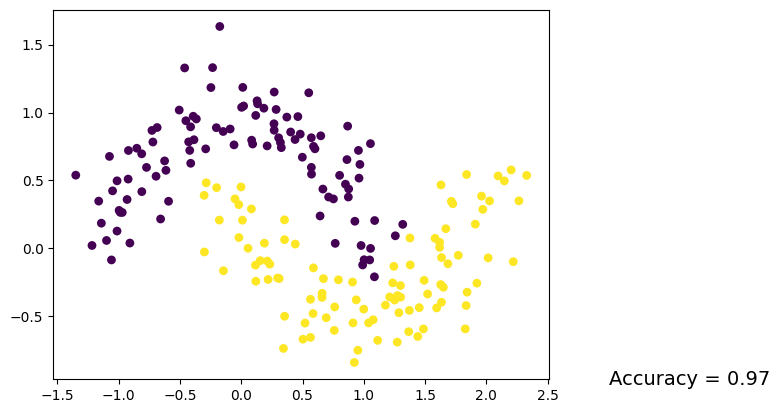

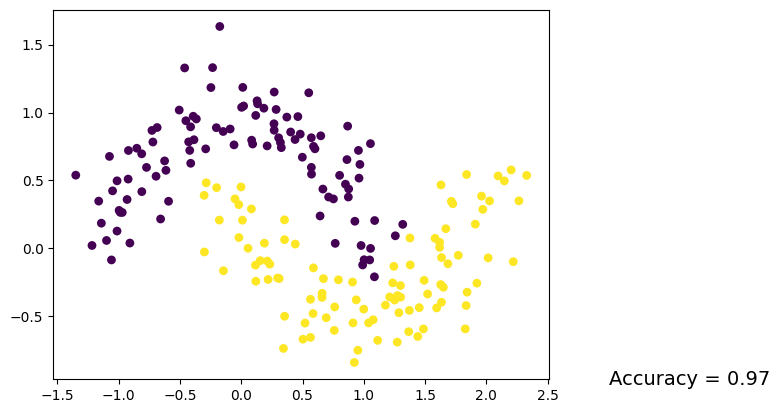

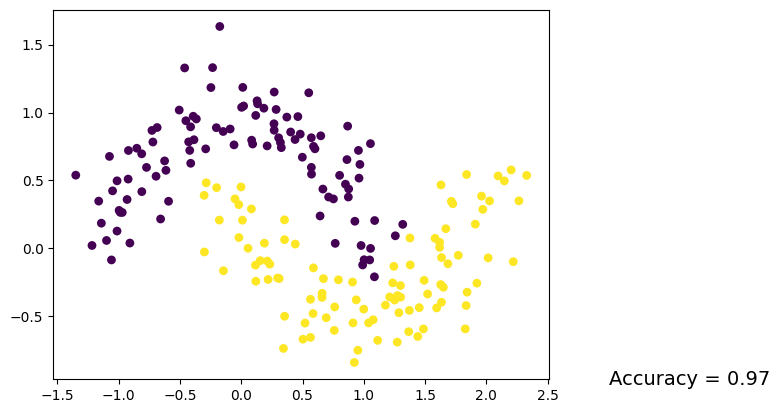

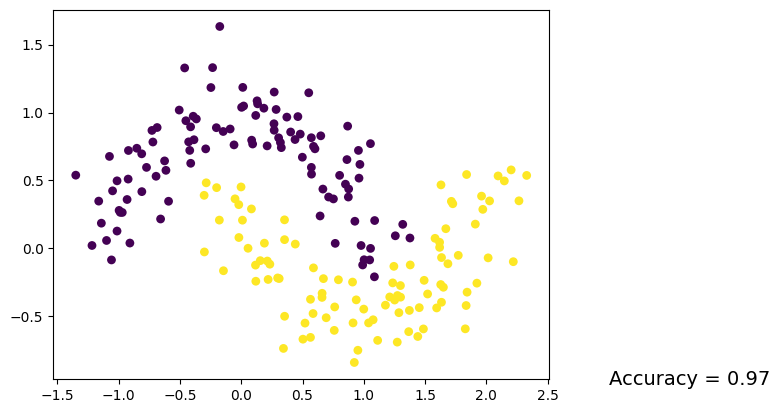

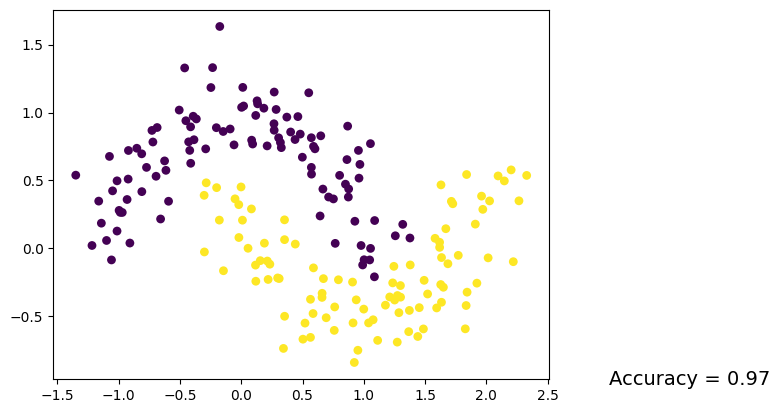

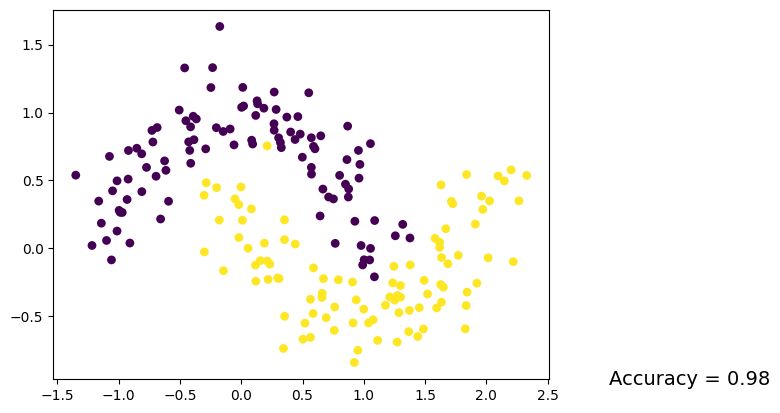

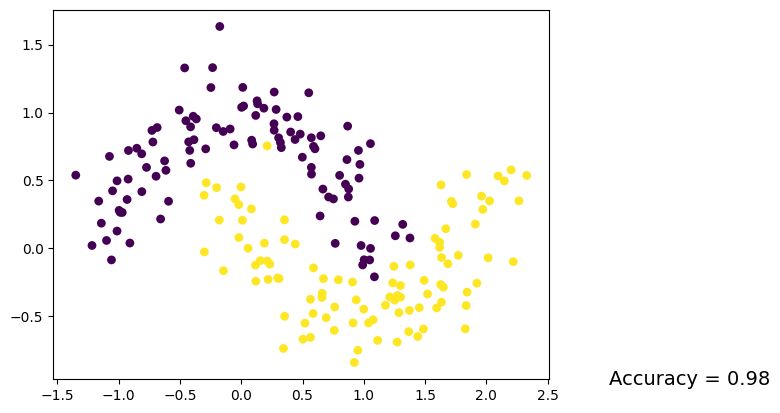

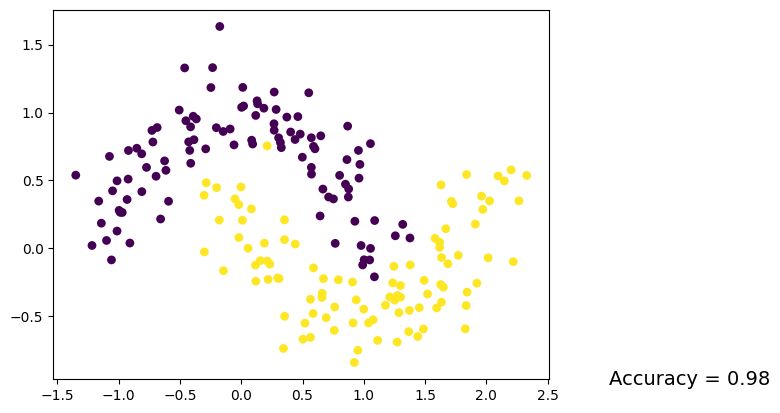

In [8]:
plt.ion()
num_epochs = 10000
for epoch in range(num_epochs):
    out = network.forward(X)
    loss_value = loss(out, y)
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        max_value, prediction = torch.max(out, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(X.data.numpy()[:,0], X.data.numpy()[:,1], s = 40, c = predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3, -1, "Accuracy = {:.2f}".format(accuracy), fontdict = {"size": 14})
        plt.pause(0.1)

plt.ioff()
plt.show()
        

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49da15f7-246c-45df-bc8f-6f9233c2b1e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>